In [1]:
# Import relevant packages and defining the current directory:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from diabetes_tools import data_describer
os.chdir('C:\Git\ML_project\ML_Project\data')

In [2]:
# Loading a copy of train set

train_set = pd.read_csv(r'train_set_disease_cat.csv')

Q1 : Which type of features are included in the data?

In [3]:
# To check the data type and the name of the features we use pd.info(). The number of missing values here are not informative.
# since these are marked with '?' in this data.
train_set.info()
# To validate that the features values indeed fits their defined data type:
print(train_set.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30419 entries, 0 to 30418
Data columns (total 53 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0.1              30419 non-null  int64 
 1   Unnamed: 0                30419 non-null  int64 
 2   encounter_id              30419 non-null  int64 
 3   patient_nbr               30419 non-null  int64 
 4   race                      30419 non-null  object
 5   gender                    30419 non-null  object
 6   age                       30419 non-null  object
 7   weight                    30419 non-null  object
 8   admission_type_id         30419 non-null  int64 
 9   discharge_disposition_id  30419 non-null  int64 
 10  admission_source_id       30419 non-null  int64 
 11  time_in_hospital          30419 non-null  int64 
 12  payer_code                30419 non-null  object
 13  medical_specialty         30419 non-null  object
 14  num_lab_procedures    

Some features are defined as 'int64' while they are actually categorical, since the numeric values represents categories.
Therefore we will convert them to categorical.
These features are: 
['admission_type_id','discharge_disposition_id', 'admission_source_id','encounter_id','patient_nbr']

In [4]:
columns_to_convert = ['admission_type_id','discharge_disposition_id', 'admission_source_id','encounter_id','patient_nbr']
train_set2 = train_set.copy()
train_set2[columns_to_convert] = train_set2[columns_to_convert].astype(str)
train_set2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30419 entries, 0 to 30418
Data columns (total 53 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0.1              30419 non-null  int64 
 1   Unnamed: 0                30419 non-null  int64 
 2   encounter_id              30419 non-null  object
 3   patient_nbr               30419 non-null  object
 4   race                      30419 non-null  object
 5   gender                    30419 non-null  object
 6   age                       30419 non-null  object
 7   weight                    30419 non-null  object
 8   admission_type_id         30419 non-null  object
 9   discharge_disposition_id  30419 non-null  object
 10  admission_source_id       30419 non-null  object
 11  time_in_hospital          30419 non-null  int64 
 12  payer_code                30419 non-null  object
 13  medical_specialty         30419 non-null  object
 14  num_lab_procedures    

In [5]:
nominal_features = train_set2.select_dtypes(include=['object', 'category'])
numeric_features = train_set2.select_dtypes(include=['int64'])

print("The data includes {} categorical features and {} numeric features".format(len(nominal_features.columns),len(numeric_features.columns)))

The data includes 43 categorical features and 10 numeric features


A1 : The data includes 50 features, 43  are categorical and 9  are numeric.
Further description of the features can be found at : 

A2: What is the proportion of missing values for each feature?

In [6]:
# Count missing values in each column
# In this data, missing values are marked with '?'

question_mark_counts = train_set2.apply(lambda col: col.value_counts().get('?', 0))
question_mark_counts_df = pd.DataFrame({'Question_Mark_Count': question_mark_counts, 'Percentage': (question_mark_counts / len(train_set)) * 100})
print(question_mark_counts_df.sort_values(by = 'Question_Mark_Count' ,ascending=False))

                          Question_Mark_Count  Percentage
weight                                  29760   97.833591
medical_specialty                       13825   45.448568
payer_code                              13509   44.409744
race                                      742    2.439265
Unnamed: 0.1                                0    0.000000
examide                                     0    0.000000
acetohexamide                               0    0.000000
glipizide                                   0    0.000000
glyburide                                   0    0.000000
tolbutamide                                 0    0.000000
pioglitazone                                0    0.000000
rosiglitazone                               0    0.000000
acarbose                                    0    0.000000
miglitol                                    0    0.000000
troglitazone                                0    0.000000
tolazamide                                  0    0.000000
insulin       

A2 : The percentage of missing values in the features: 'payer code', 'medical specialty' and 'weight' is >40%.
In particular the 'weight' feature includes ~97% missing values.
Some values are missing in each of the diagnoses and the race.
The rest of the features does not include missing values.

Q3: What are the possible usefulness of the features to the task? based on domain knowledge.
To answer this question we will divide the features to categorical and numeric and address the question for each.

In [7]:
print(nominal_features.columns)

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'categoricalValue'],
      dtype='object')


A3_1: categorical features: 
Based on ADA standards of care, most of the categorical features included should be important for the prediction of readmission. Unfortunately, weight which show a causal relationship with the severity of metabolic diseases in general and in particular with Type II diabetes, include significant and critical number of missing values and therefore cannot be a useful feature in this analysis.
The features 'payer code','encounter_id, 'patient_nbr' are not important for the prediction, because it has nothing to do with the probability of readmission.

In [8]:
print(numeric_features.columns)

Index(['Unnamed: 0.1', 'Unnamed: 0', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses'],
      dtype='object')


A3_2: numeric features:
All the numeric features may be useful for the prediction.

Q4: What is the distribution of values in each of the features?

For this we will again look at each group of features separately.
Below, we will plot the distribution of unique values for all categorical features except of 'encounter_id','payer_code' and 'patient_nbr'. Because they have a large number of independent categories that are most likely not important for our objective.

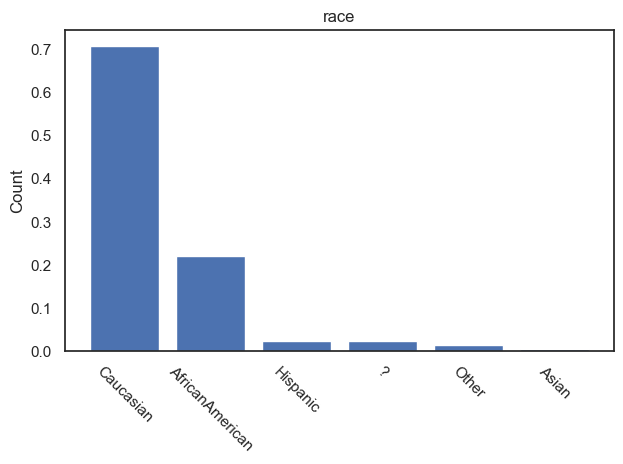

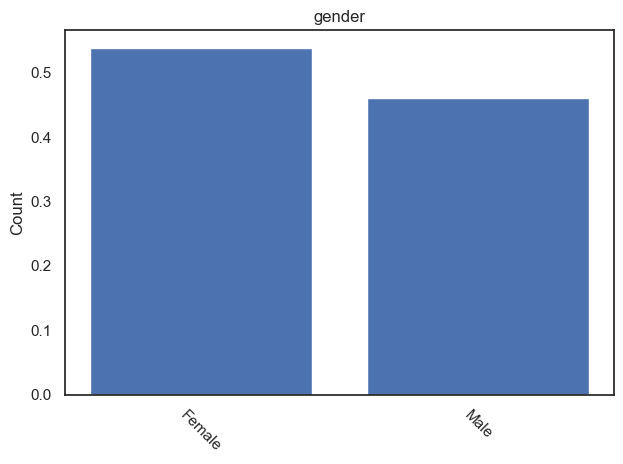

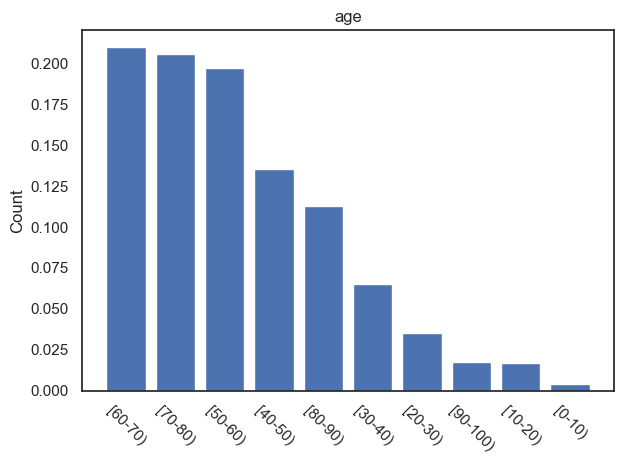

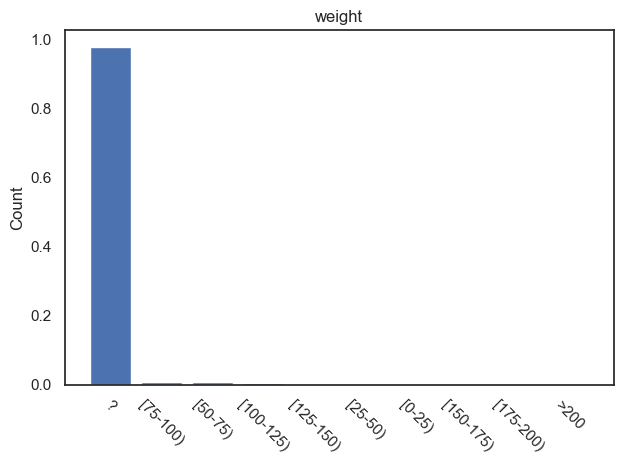

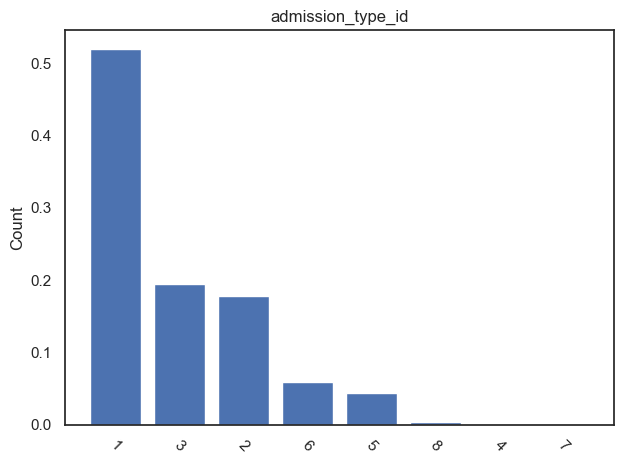

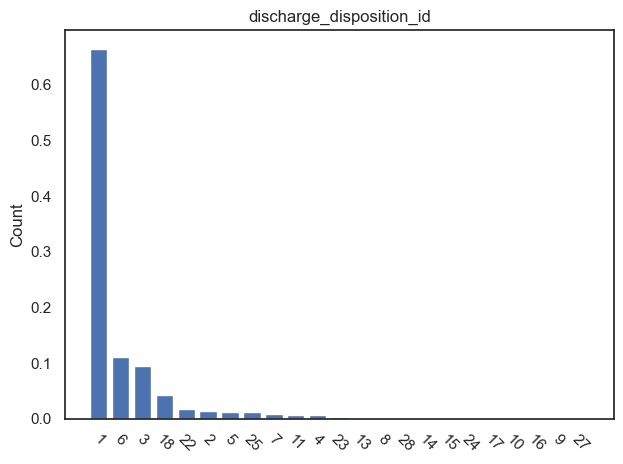

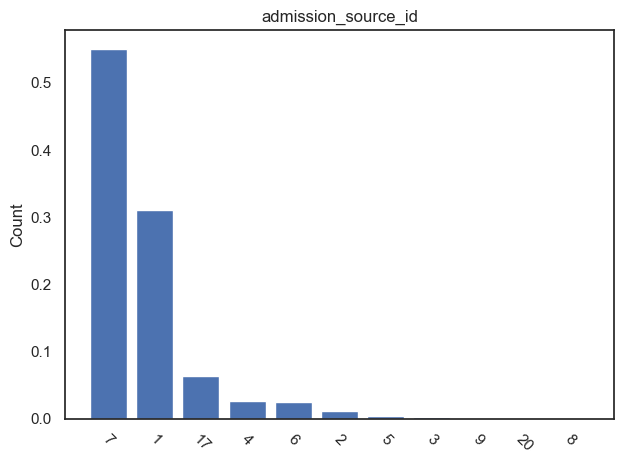

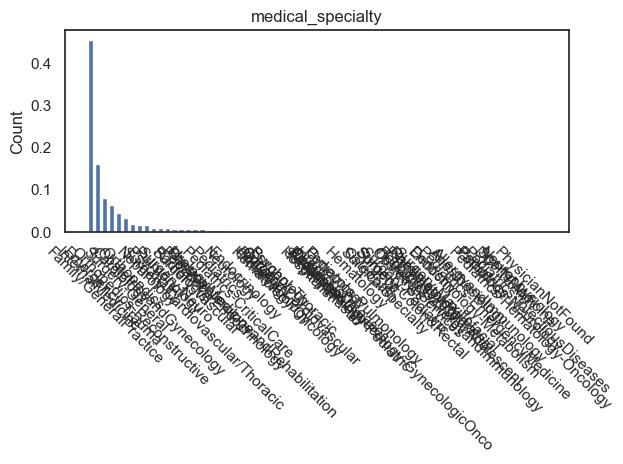

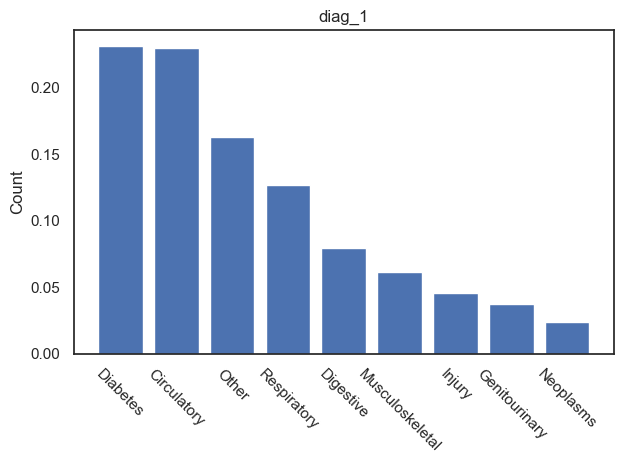

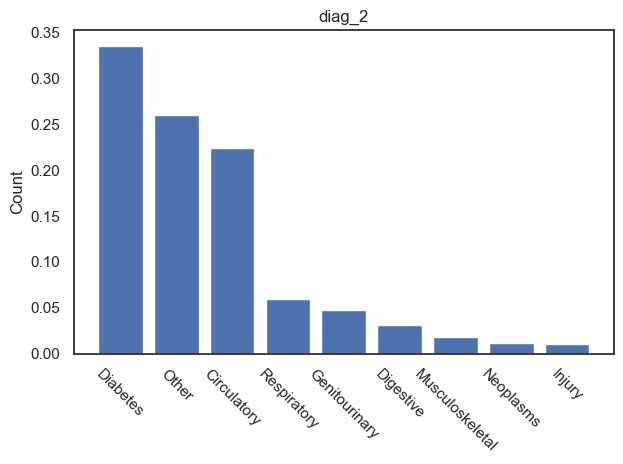

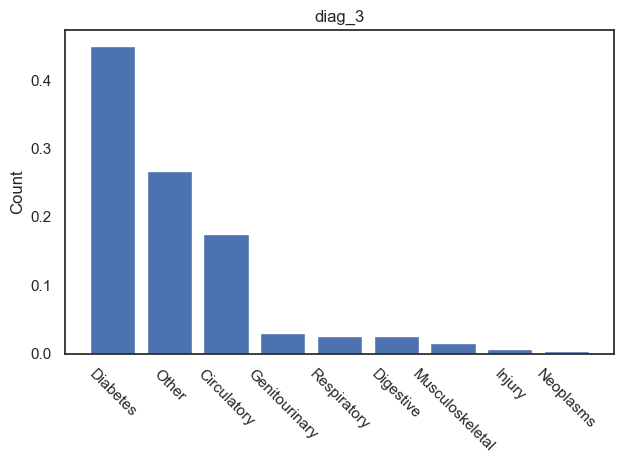

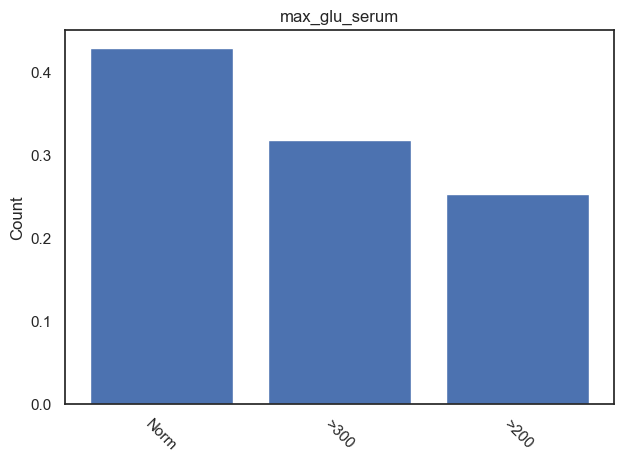

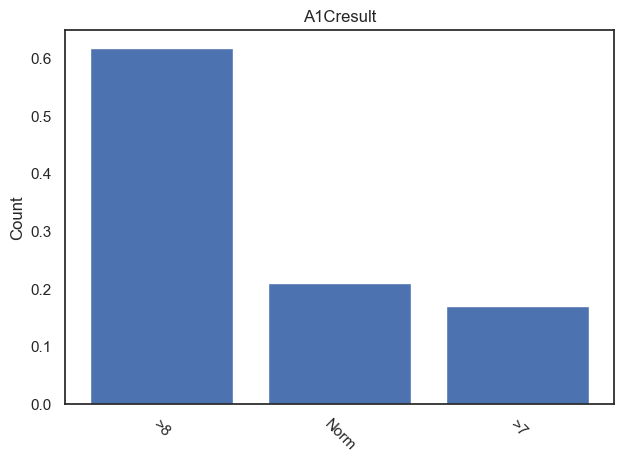

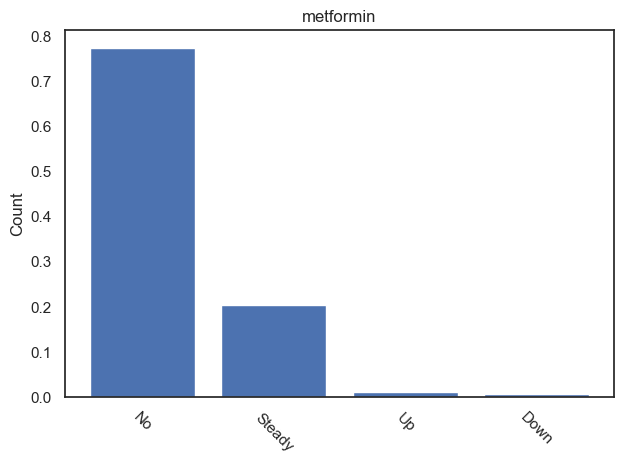

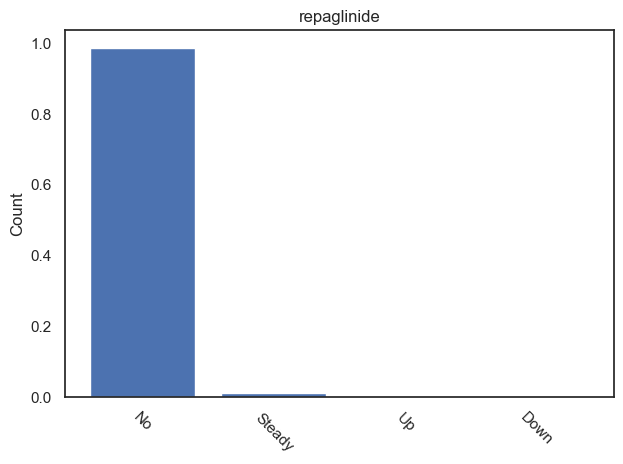

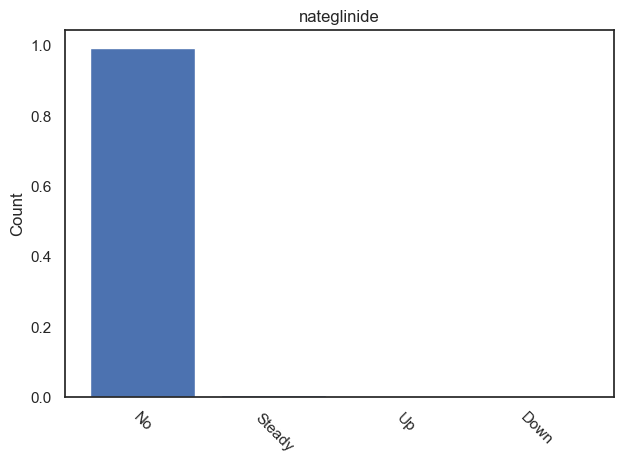

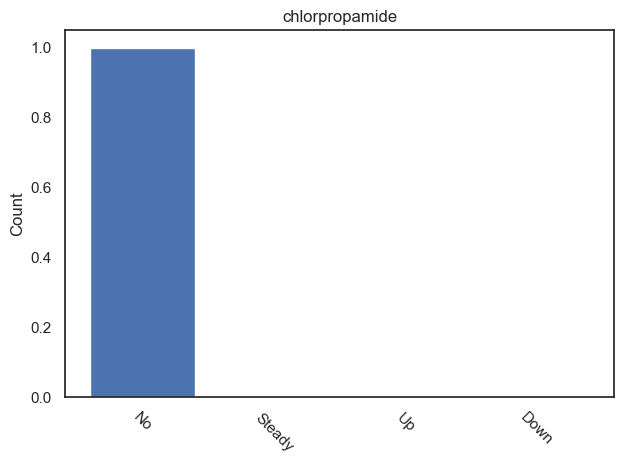

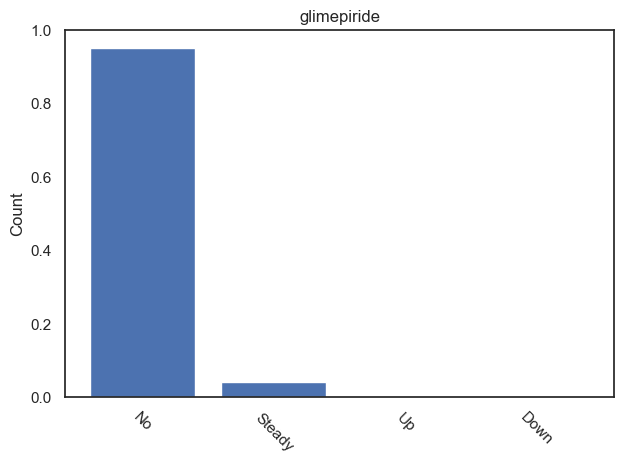

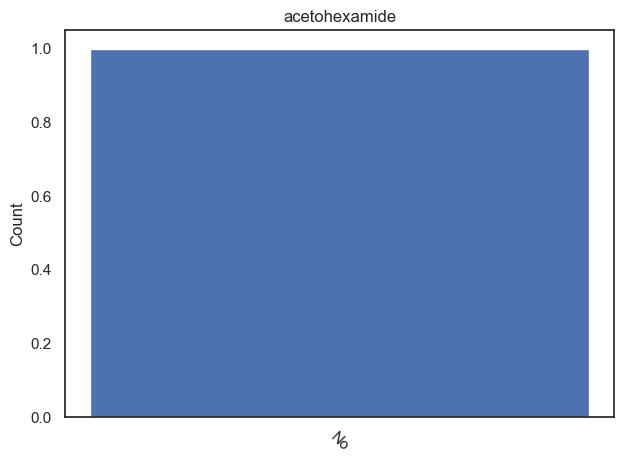

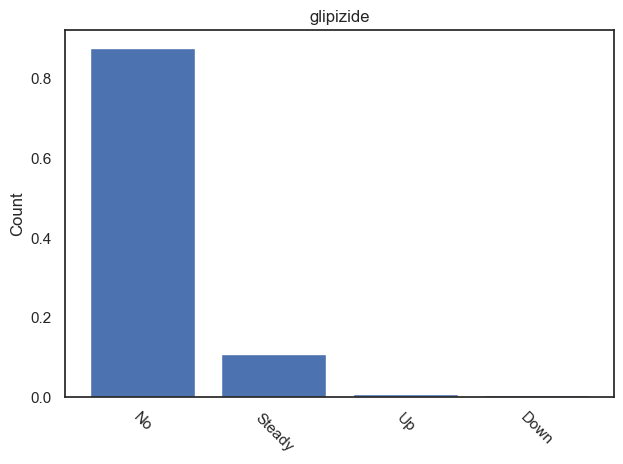

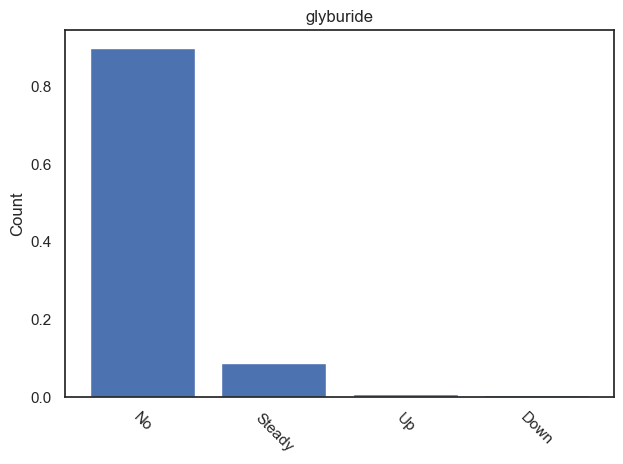

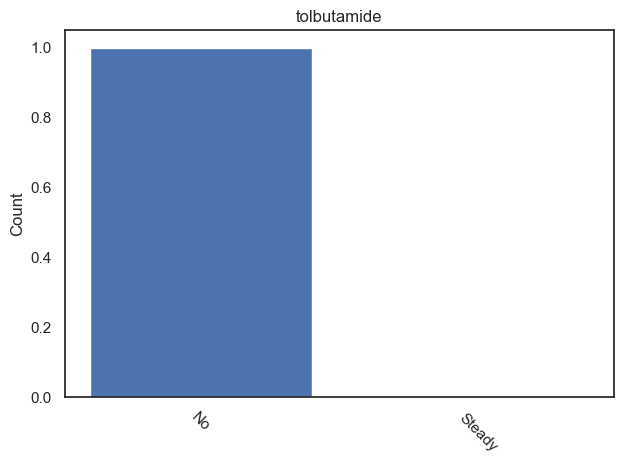

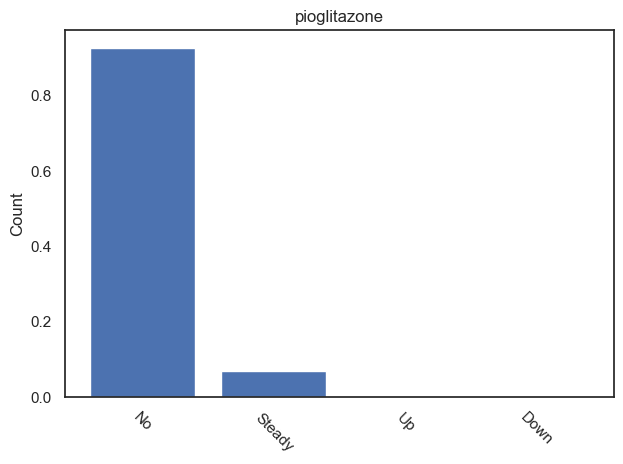

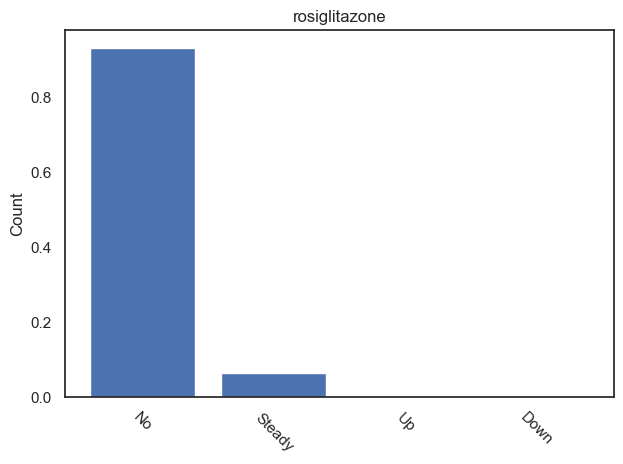

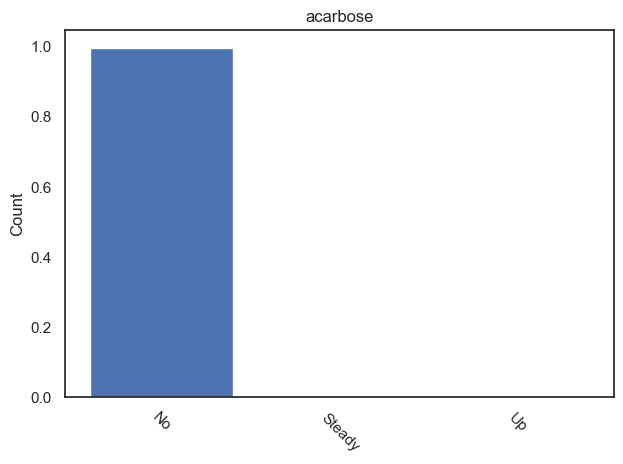

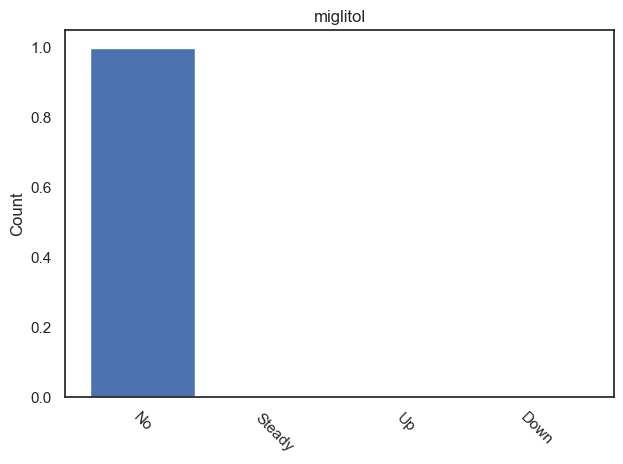

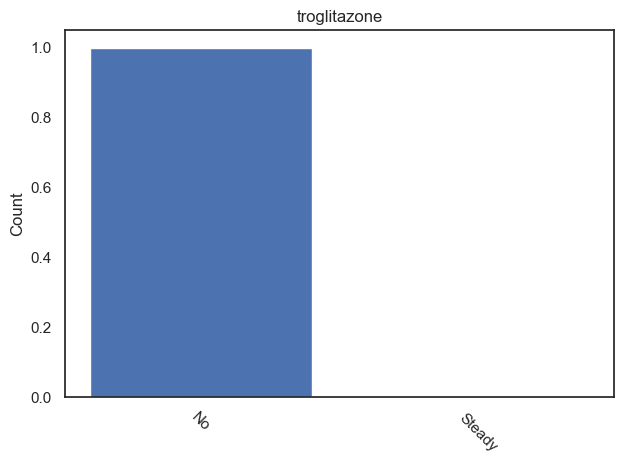

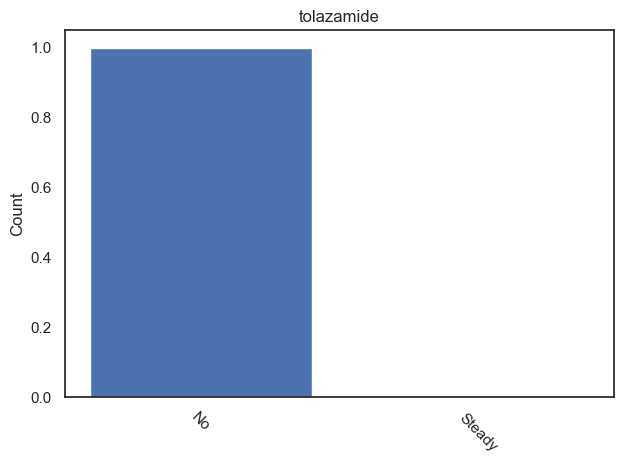

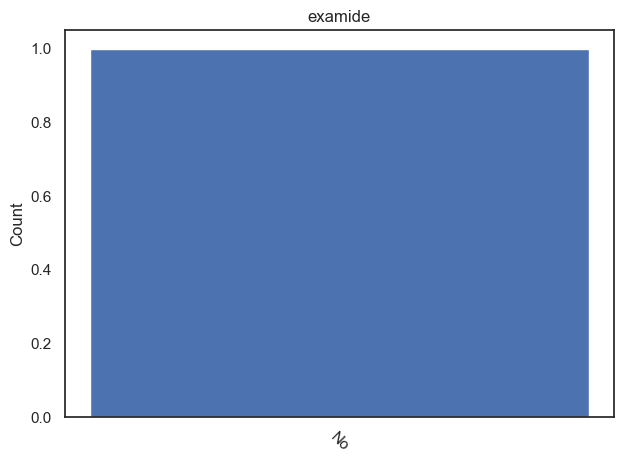

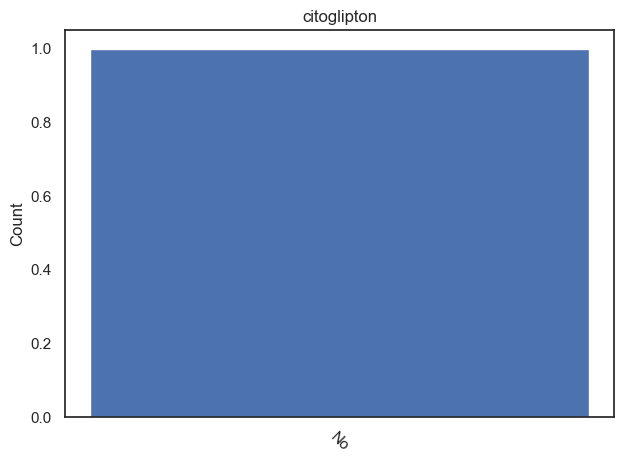

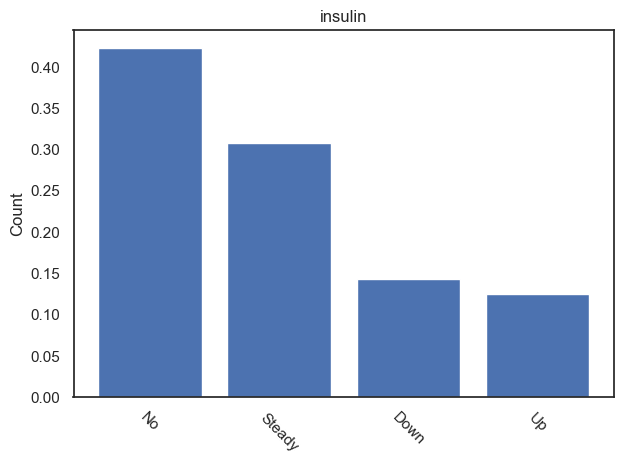

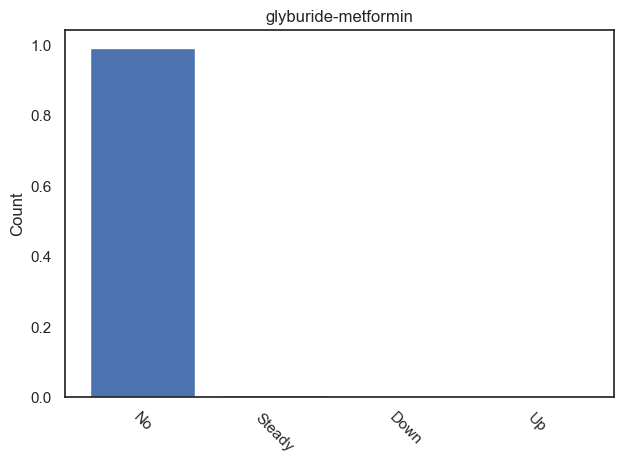

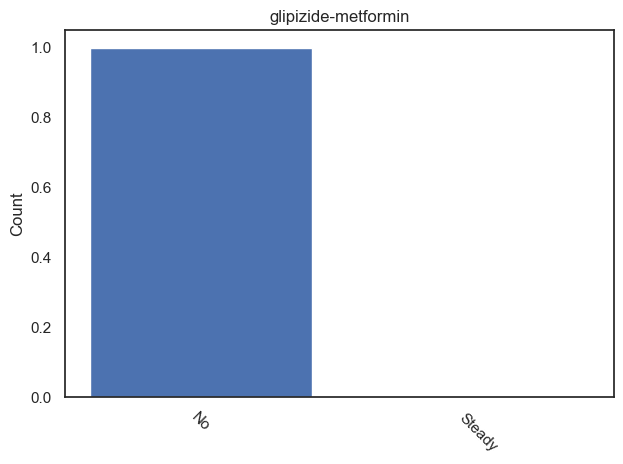

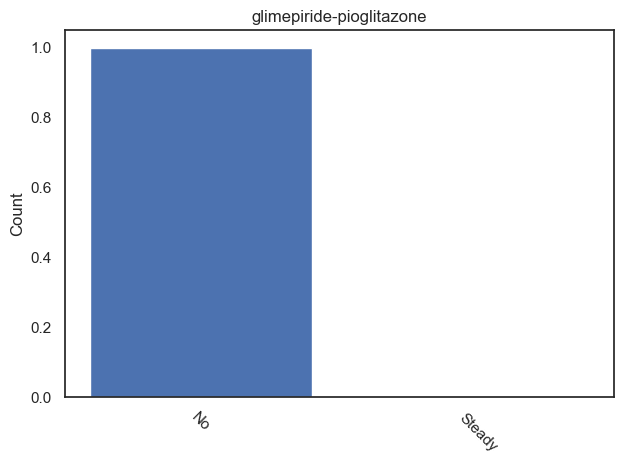

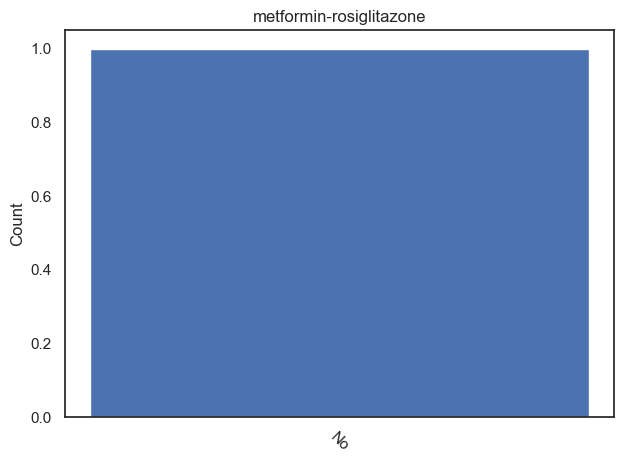

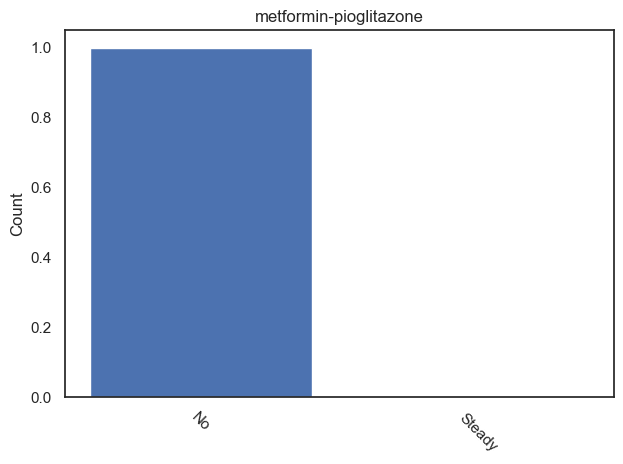

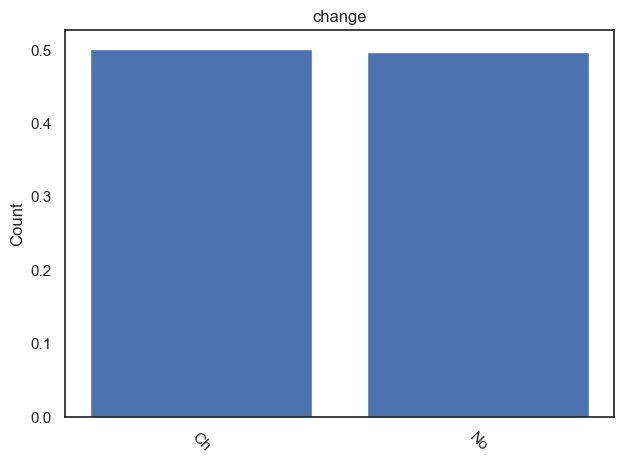

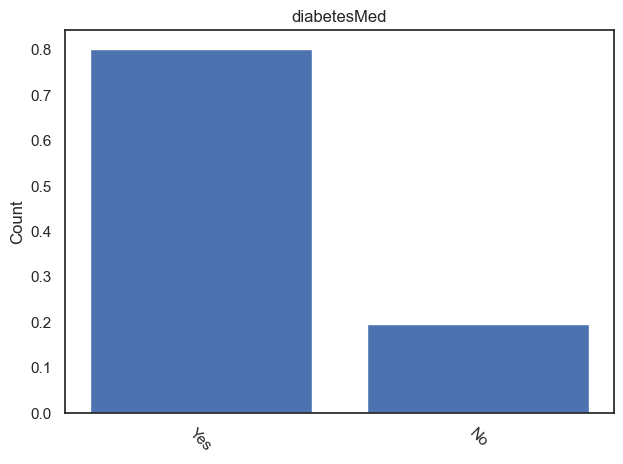

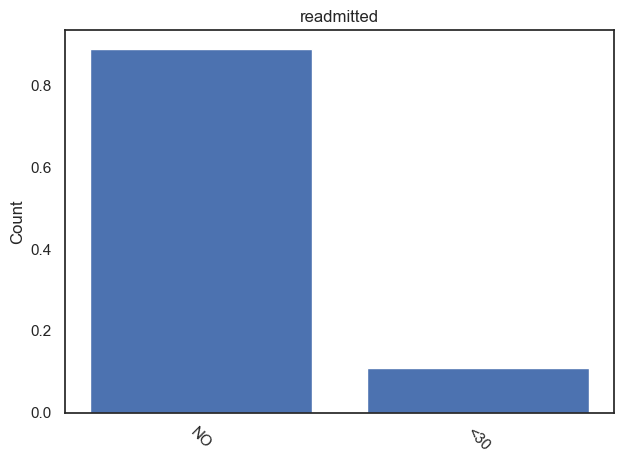

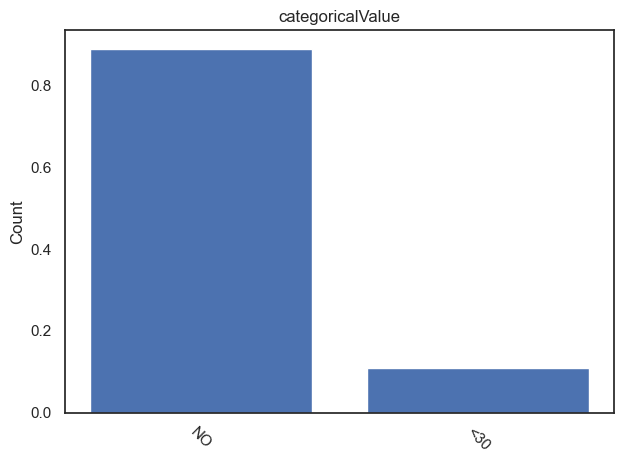

In [9]:
nominal_features_to_discard = ['encounter_id','patient_nbr','payer_code']
nominal_features_subset = nominal_features.drop(nominal_features_to_discard, axis=1)

sns.set(style="white")

for col in nominal_features_subset.columns:
    count = nominal_features_subset[col].value_counts(normalize=True)
    plt.bar(count.index, count.values)
    plt.ylabel('Count')
    plt.title(col)
    plt.xticks(rotation=-45)
    plt.tight_layout()
    plt.show()

A4_categorical:
Conclusions:
Distribution of categorical features:
    Race: most of patients are Caucasians
    Gender: roughly evenly distributed.
    Age: ~70% of the patients are older than 50.
    Diagnoses: Diabetes is mostly co-occuring with circulatory diseases, and it is the most prevalent primary diagnosis.
    Serum glucose: roughly evenly distributed.
    A1C: 60% of the patients has values higher than 8.
    Medications:
    Most of the medications included in the data were mostly(=>80% of the patients for each) not prescribed.
    Insulin: ~40% of the patients were not treated with insulin and 30% had a stable treatment.
    However, according to the feature 'diabetesMed' we can see that ~80% of the patients were prescribed with medications. so there may be a discrepancy here.
    Change in medications: evenly distributed.
    Some of the medications has one value. 

The label which is the target feature 'readmitted' is imbalanced. ~80% of the patients were not readmitted.

array([[<Axes: title={'center': 'Unnamed: 0.1'}>,
        <Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'time_in_hospital'}>],
       [<Axes: title={'center': 'num_lab_procedures'}>,
        <Axes: title={'center': 'num_procedures'}>,
        <Axes: title={'center': 'num_medications'}>],
       [<Axes: title={'center': 'number_outpatient'}>,
        <Axes: title={'center': 'number_emergency'}>,
        <Axes: title={'center': 'number_inpatient'}>],
       [<Axes: title={'center': 'number_diagnoses'}>, <Axes: >, <Axes: >]],
      dtype=object)

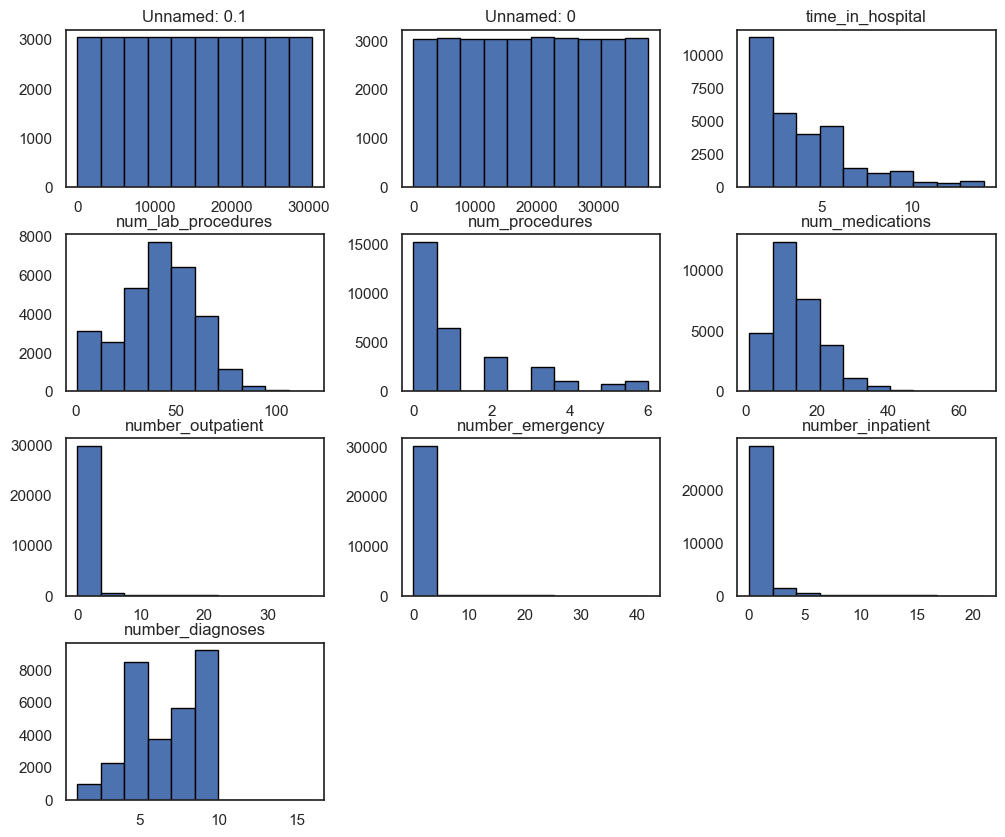

In [10]:
numeric_features.hist(grid=False,figsize=(12,10),edgecolor='black')

In [11]:
numeric_features.describe()

,Unnamed: 0.1,Unnamed: 0,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,30419.000000,30419.000000,30419.000000,30419.000000,30419.000000,30419.000000,30419.000000,30419.000000,30419.000000,30419.000000
mean,15209.000000,19031.390940,3.928269,41.476314,1.151090,14.563825,0.328676,0.215655,0.611591,6.426411
std,8781.353256,10976.367154,2.784201,19.338449,1.574937,7.615602,1.168829,0.944048,1.361049,2.207049
min,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,7604.500000,9516.500000,2.000000,30.000000,0.000000,9.000000,0.000000,0.000000,0.000000,5.000000
50%,15209.000000,19074.000000,3.000000,43.000000,1.000000,13.000000,0.000000,0.000000,0.000000,6.000000
75%,22813.500000,28526.500000,5.000000,55.000000,2.000000,19.000000,0.000000,0.000000,1.000000,9.000000
max,30418.000000,38022.000000,14.000000,118.000000,6.000000,67.000000,37.000000,42.000000,21.000000,16.000000


A4_numerical:
Results:
    1. The numerical features are not normally distributed.
    2. In the features 'number_outpatient', 'number_emergency' and 'number_inpatient' most of the values are close to 0.
    3. Number of diagnoses and number of medications includes outliers (>2 std units above the mean).
Conclusions:
    1. If the model that we will use will rely on the assumption that the numeric features are normally distributed we will transform these features.
    2. Since most of the values are in a narrow range or similar, we will covert this feature to categorical.
    3. WHAT SHOULD WE DO WITH THE OUTLIERS?  

Q5: Did any of the patients has multiple encounters?

In [12]:
multiple_encounters = train_set2['patient_nbr'].duplicated(keep=False).sum()

# Get unique duplicated values
unique_multiple_encounters = train_set2[train_set2.duplicated(subset='patient_nbr', keep=False)]['patient_nbr'].unique()
# Count the number of unique duplicated values
num_unique_multiple_encounters = len(unique_multiple_encounters)

print(f"Number of duplicates in 'patient_nbr': {multiple_encounters}")
print(f"Number of unique duplicated values: {num_unique_multiple_encounters}")

Number of duplicates in 'patient_nbr': 7786
Number of unique duplicated values: 3094


A5: There are 3094 patients with more than one encounter.

Q6: Are all the distinct values of the ID coded features necessary?

In [13]:
# For this, we will load the published tables describing the IDs.
ids = pd.read_csv('IDS_mapping.csv')
for c in ids.columns:
    print(c)
    print(ids[c].dropna().values)

admission_type_id
[1. 2. 3. 4. 5. 6. 7. 8.]
description
['Emergency' 'Urgent' 'Elective' 'Newborn' 'Not Available' 'Trauma Center'
 'Not Mapped']
discharge_disposition_id
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 30 27 28 29]
description.1
['Discharged to home'
 'Discharged/transferred to another short term hospital'
 'Discharged/transferred to SNF' 'Discharged/transferred to ICF'
 'Discharged/transferred to another type of inpatient care institution'
 'Discharged/transferred to home with home health service' 'Left AMA'
 'Discharged/transferred to home under care of Home IV provider'
 'Admitted as an inpatient to this hospital'
 'Neonate discharged to another hospital for neonatal aftercare' 'Expired'
 'Still patient or expected to return for outpatient services'
 'Hospice / home' 'Hospice / medical facility'
 'Discharged/transferred within this institution to Medicare approved swing bed'
 'Discharged/transferred/referred another institution for ou

A6: Some of the patients were either expired or discharged to hospice. Some were admitted from hospice.
At all features some of the values are redundant and can be regrouped. For example, Expired at home and expired in medical facility can be
regrouped to 'expired'.

Q7: Does the proportion of readmission varies within the values of the categorical variables?
Multivariate analysis: group each feature by 'readmission'. plot the proportion of unique counts per group and feature.

C:\Users\User\AppData\Local\Temp\ipykernel_12252\1539051936.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=-45)
C:\Users\User\AppData\Local\Temp\ipykernel_12252\1539051936.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=-45)
C:\Users\User\AppData\Local\Temp\ipykernel_12252\1539051936.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=-45)
C:\Users\User\AppData\Local\Temp\ipykernel_12252\1539051936.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=-

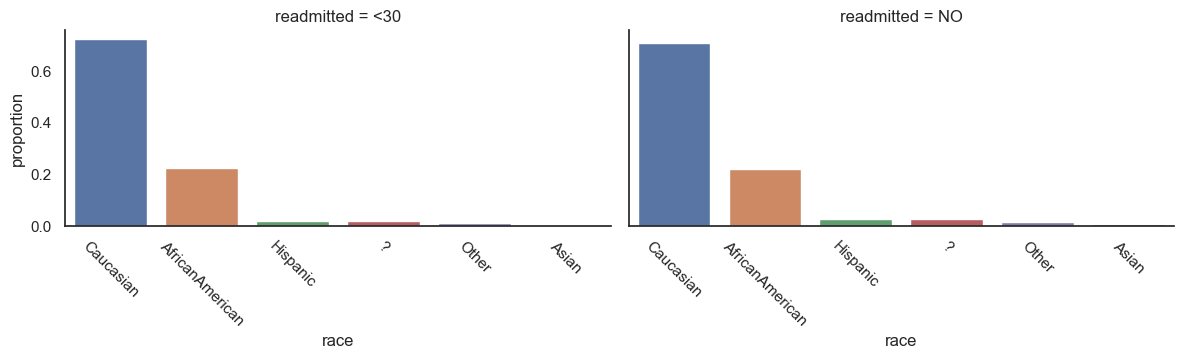

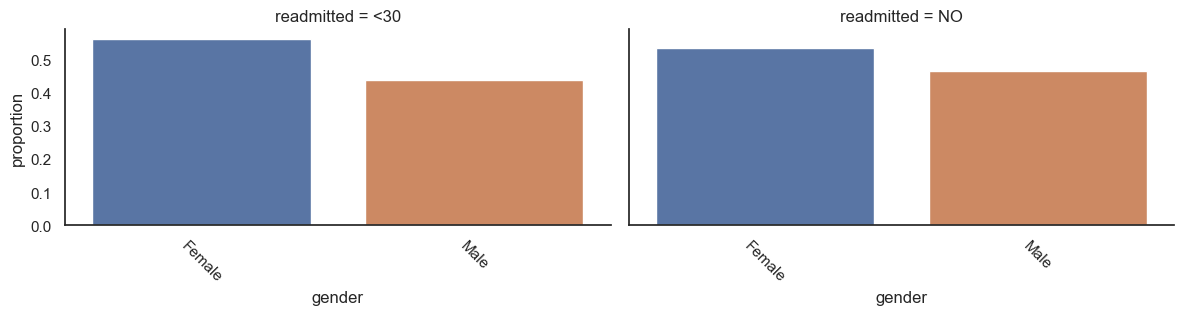

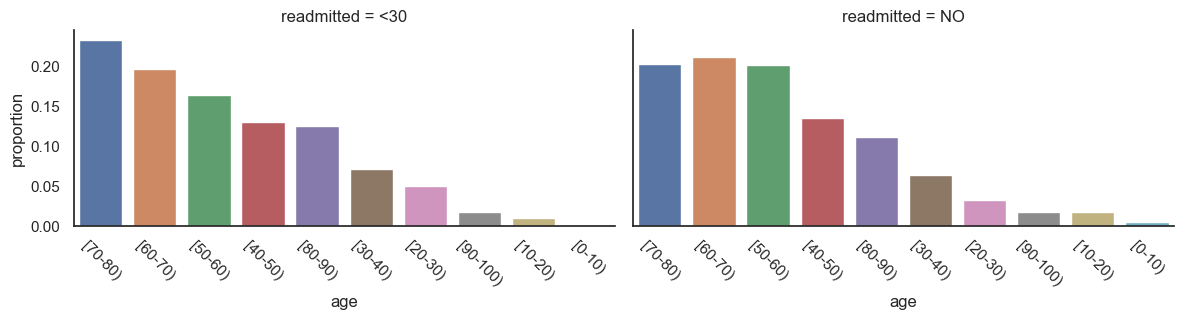

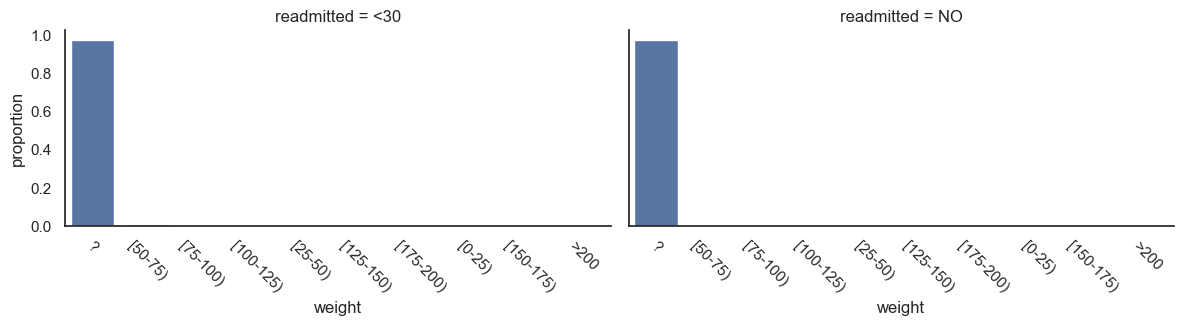

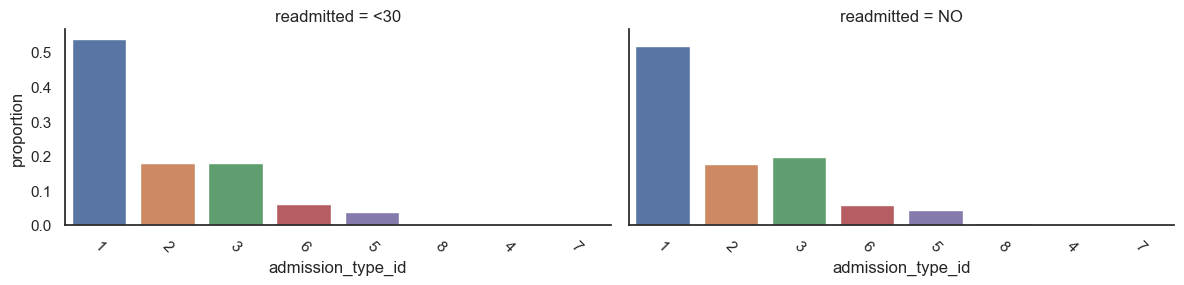

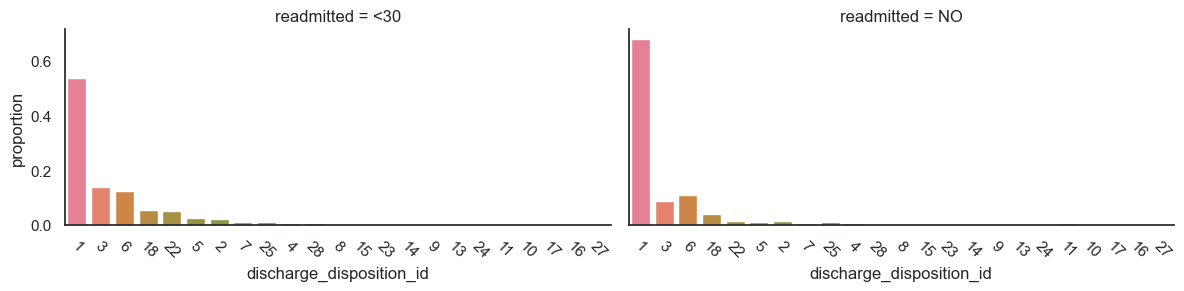

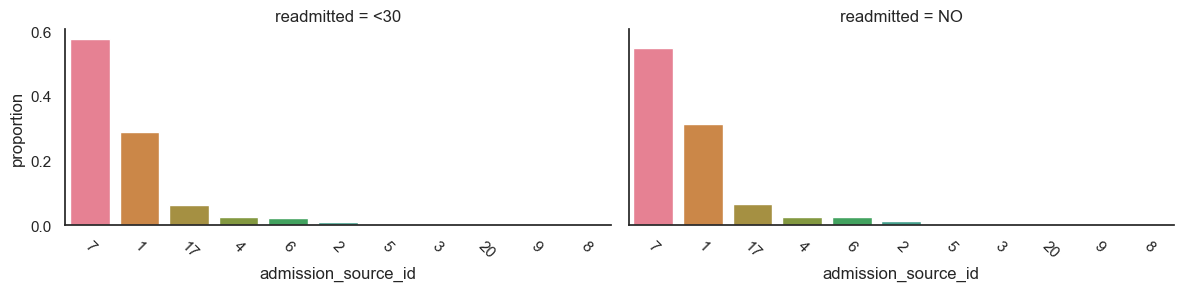

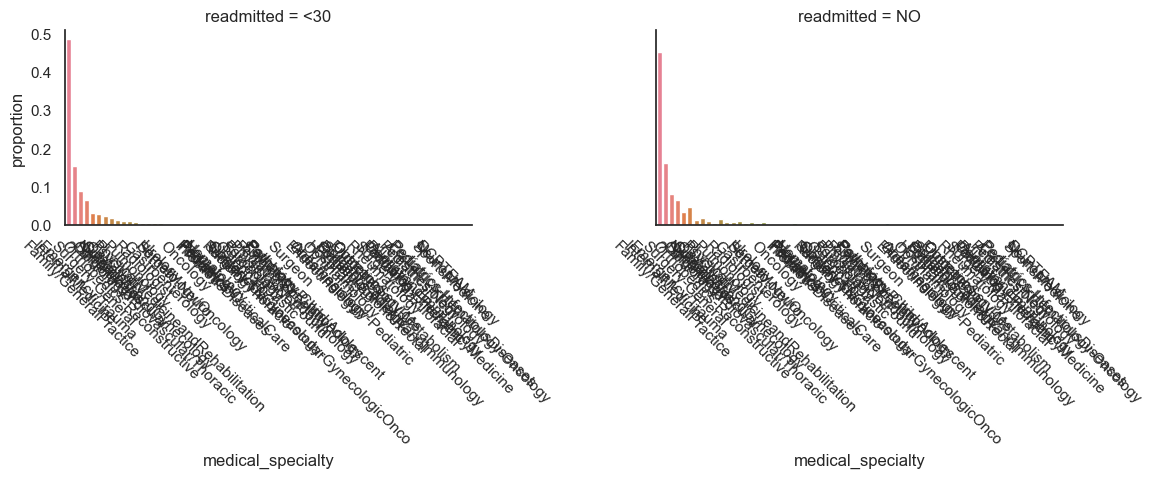

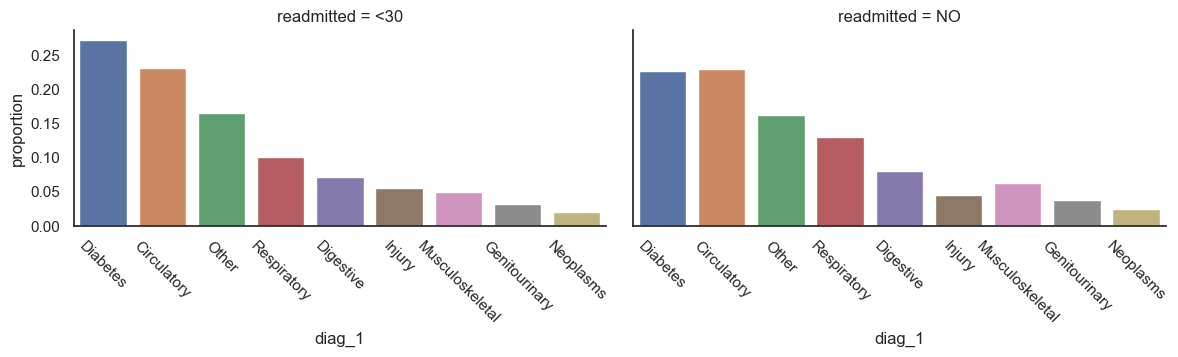

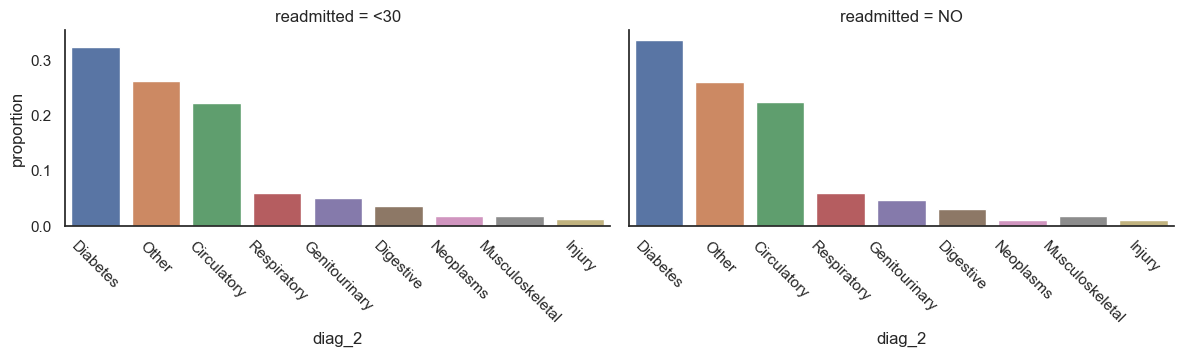

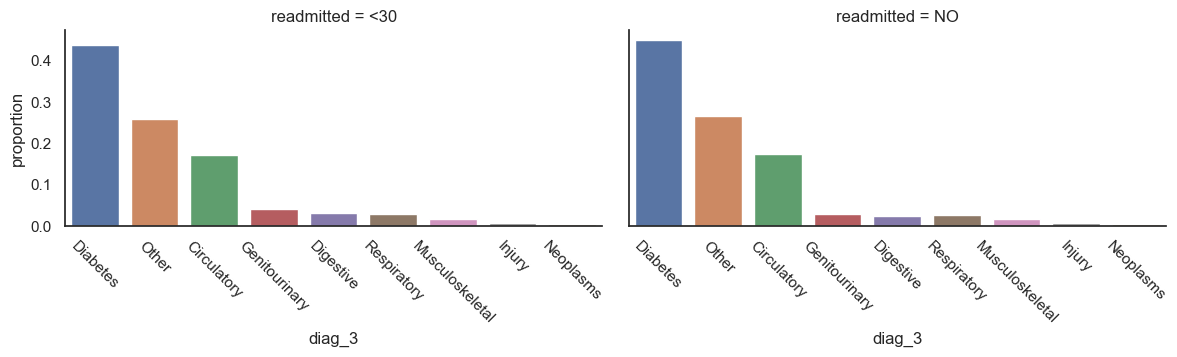

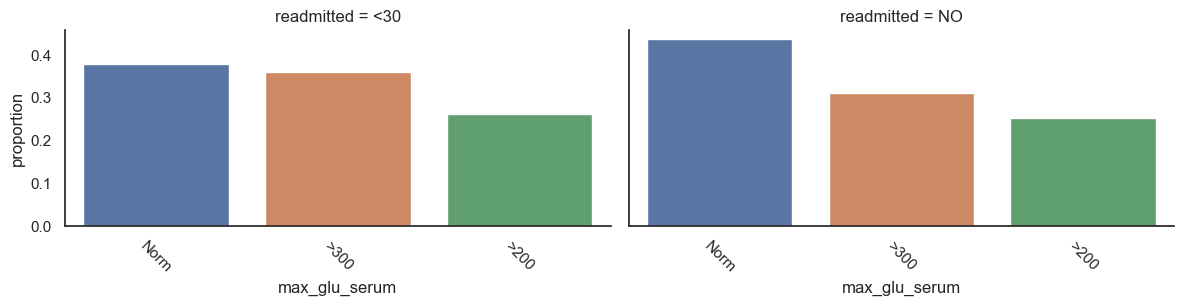

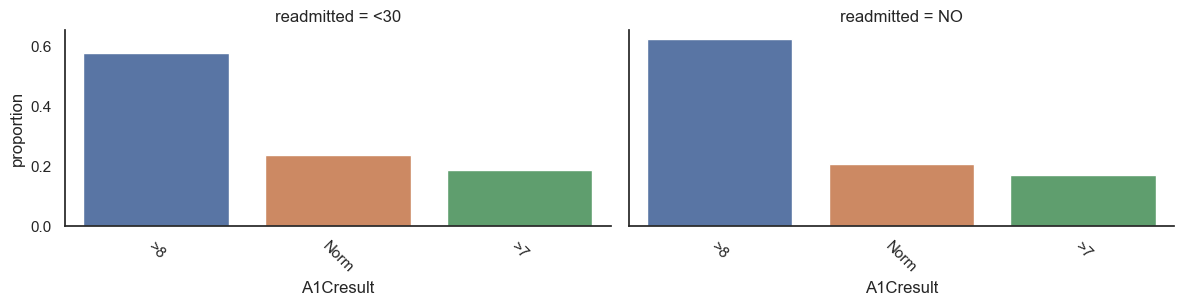

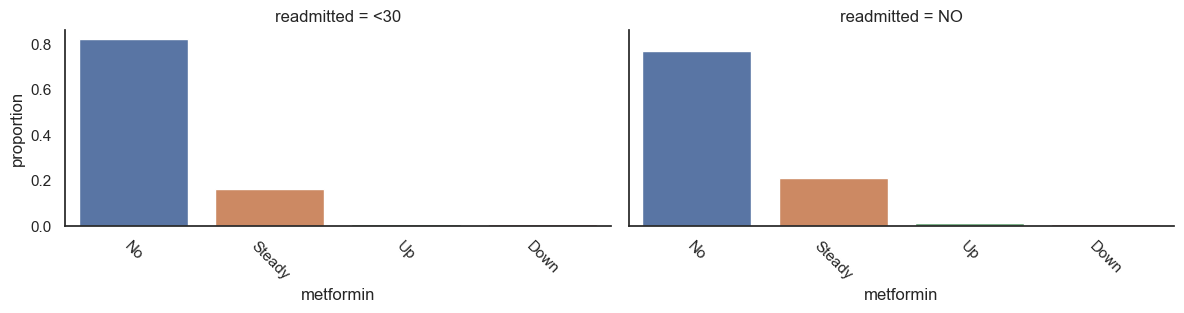

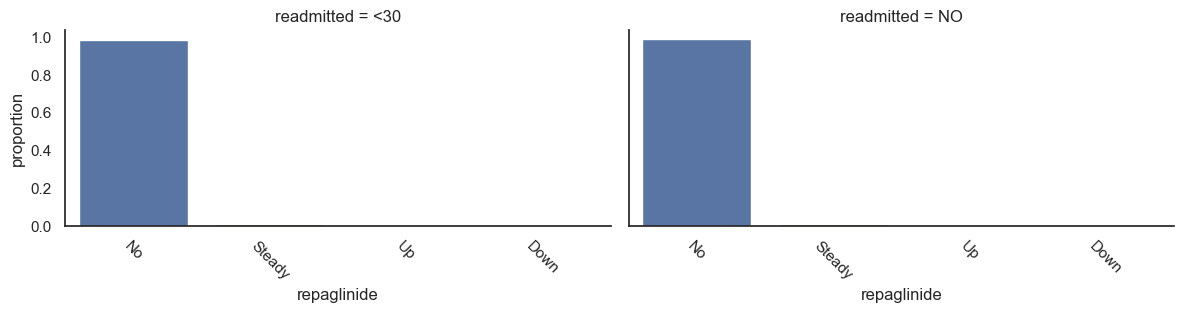

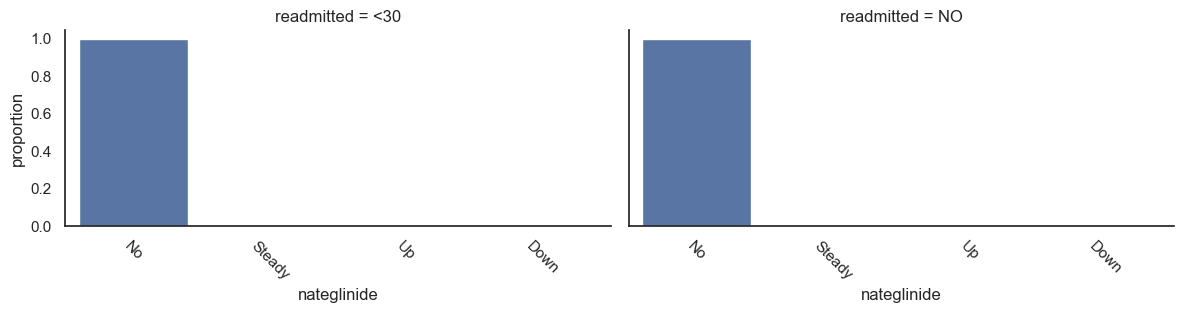

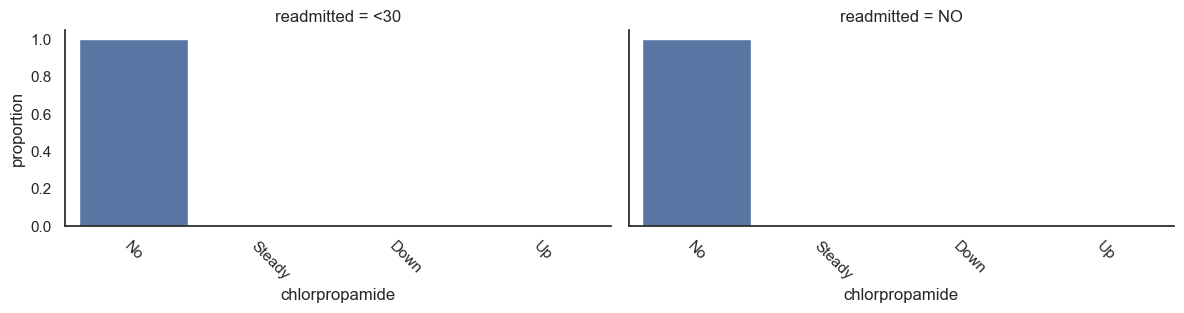

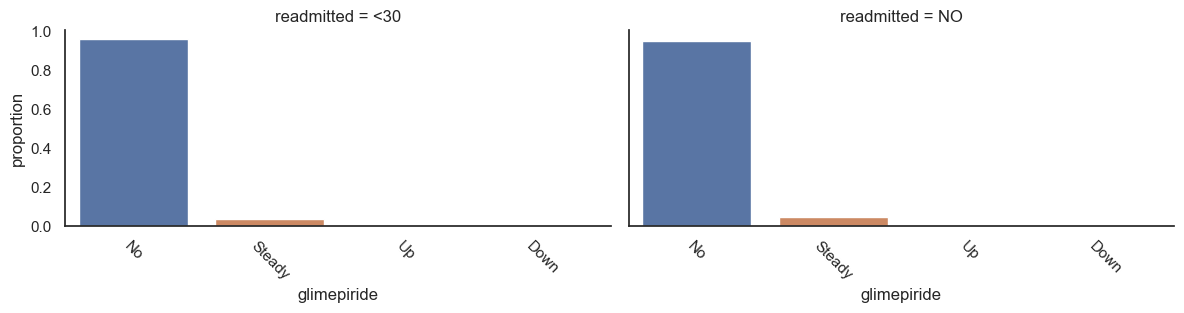

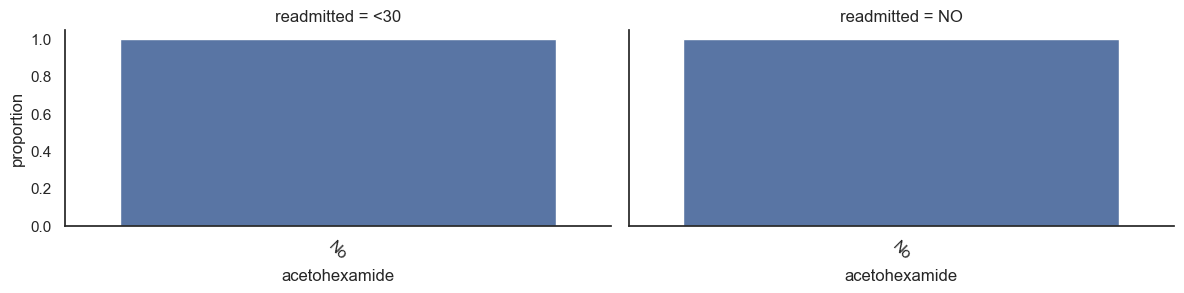

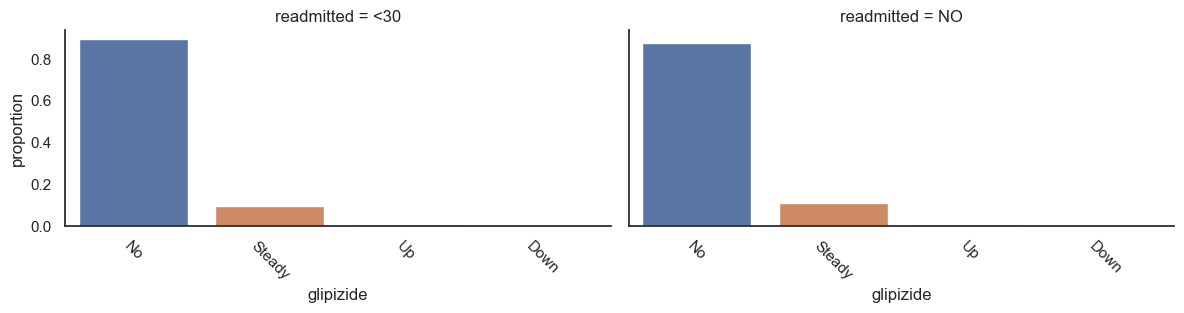

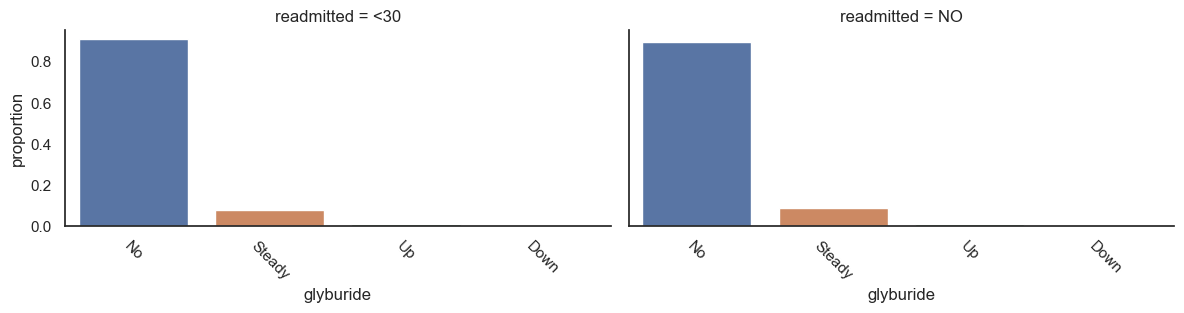

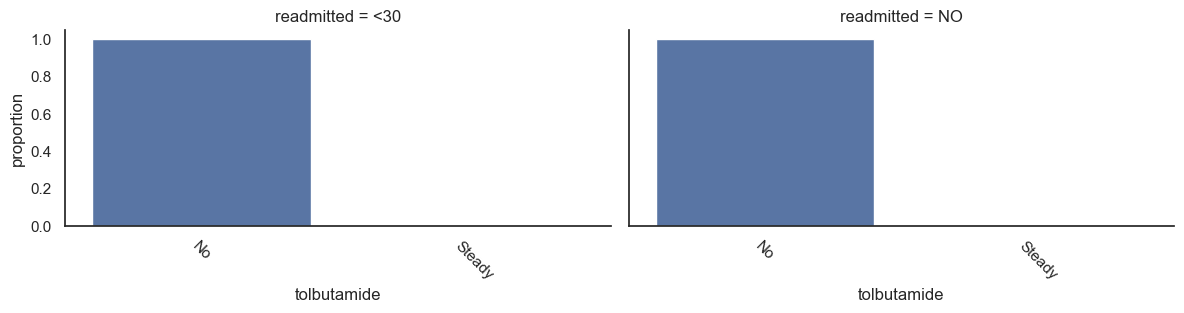

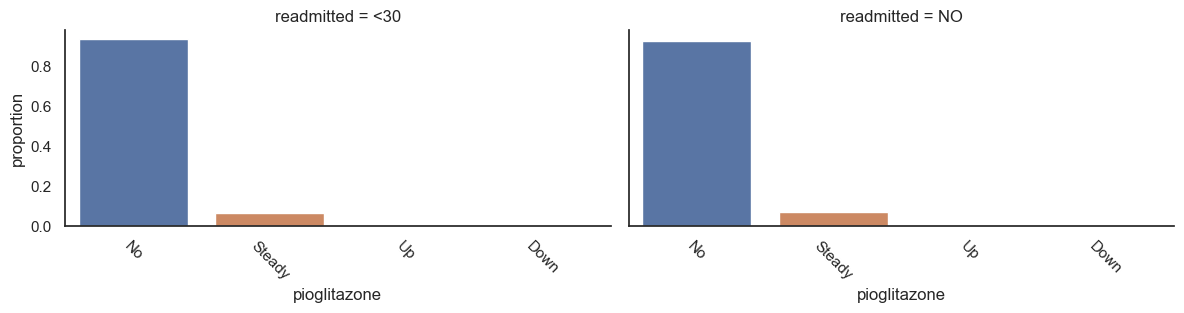

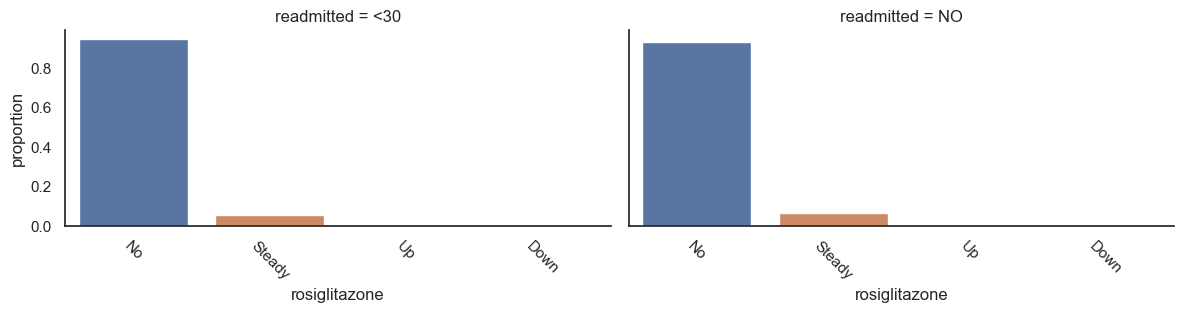

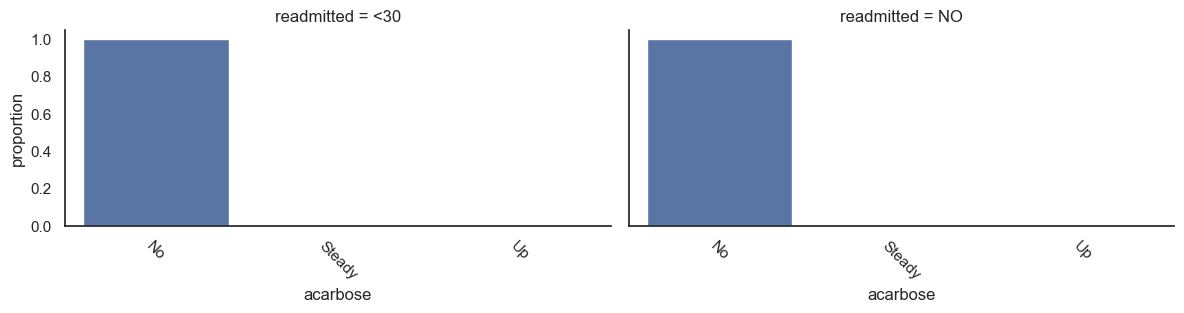

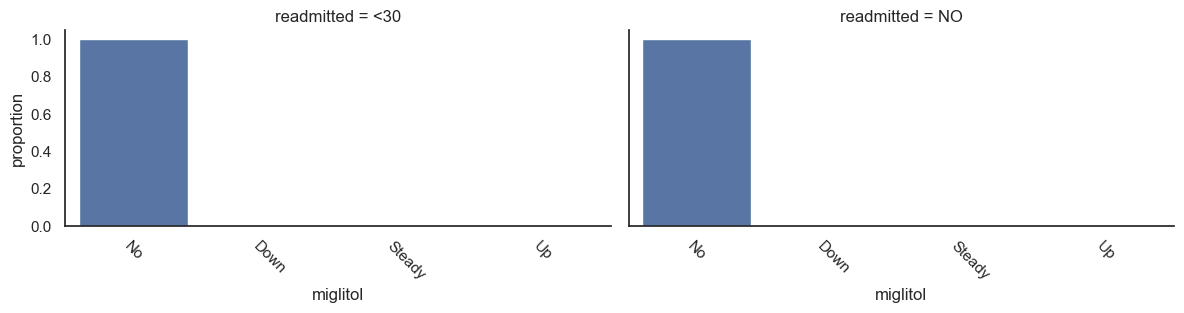

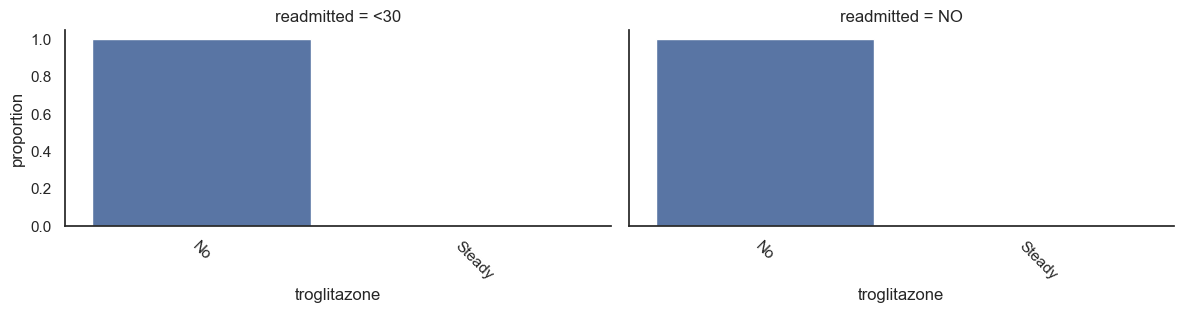

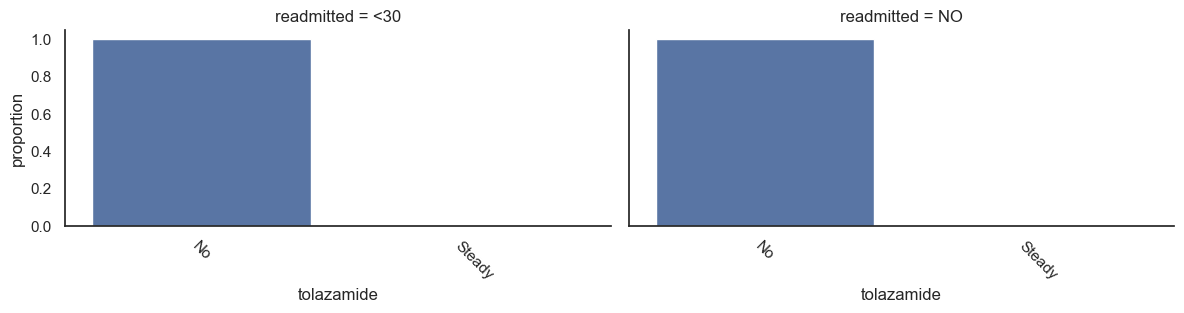

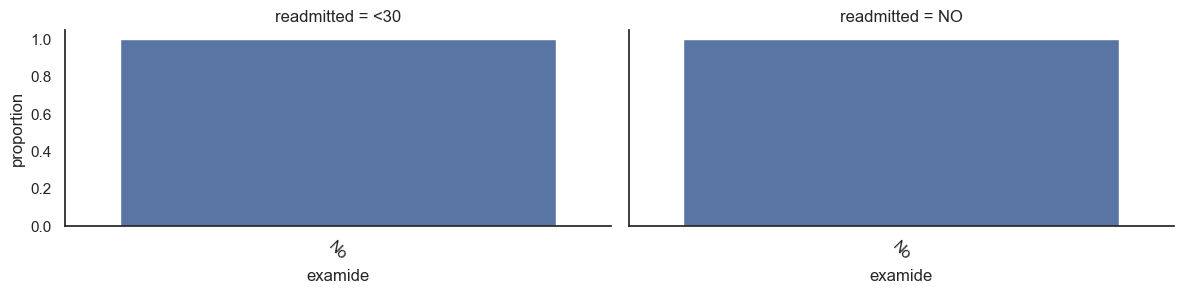

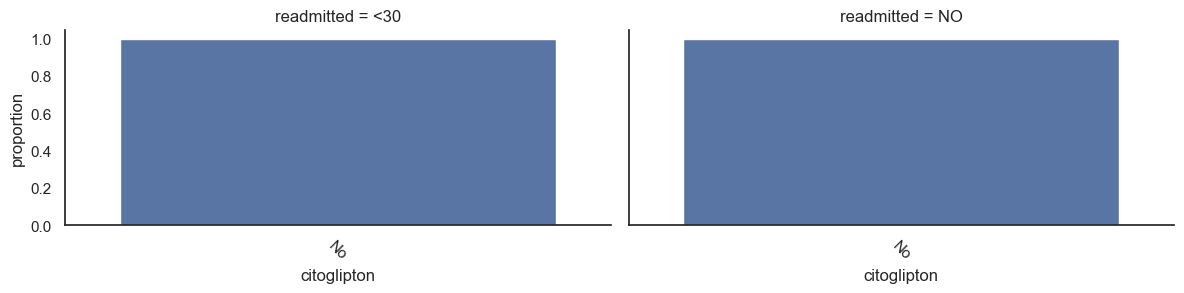

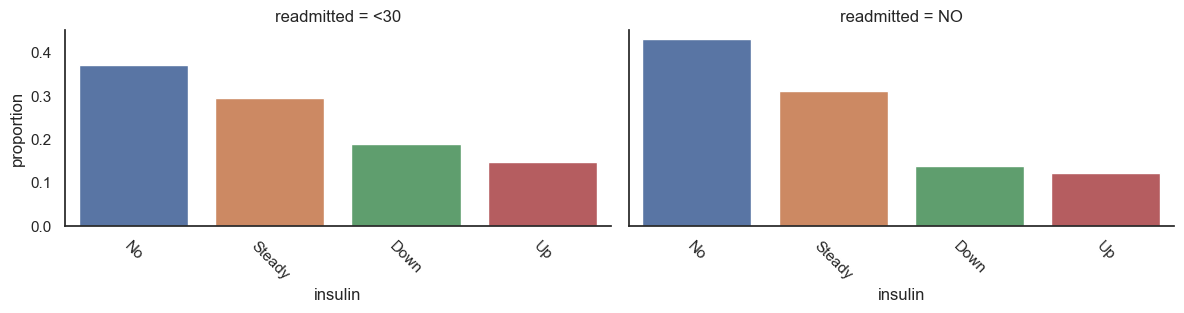

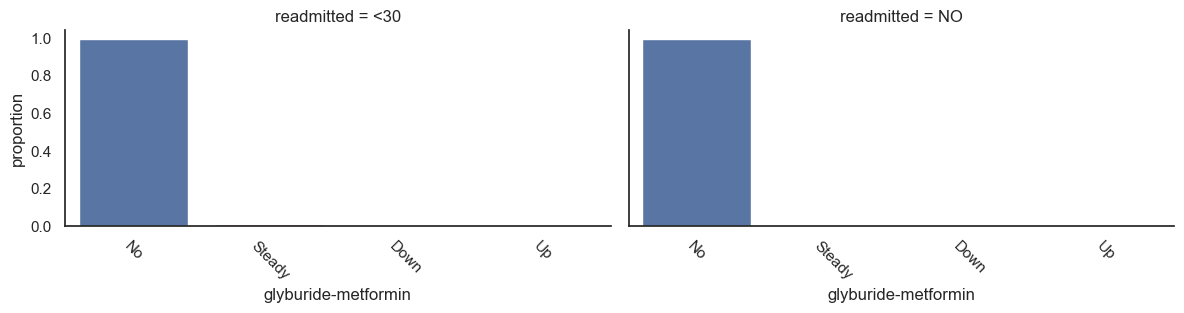

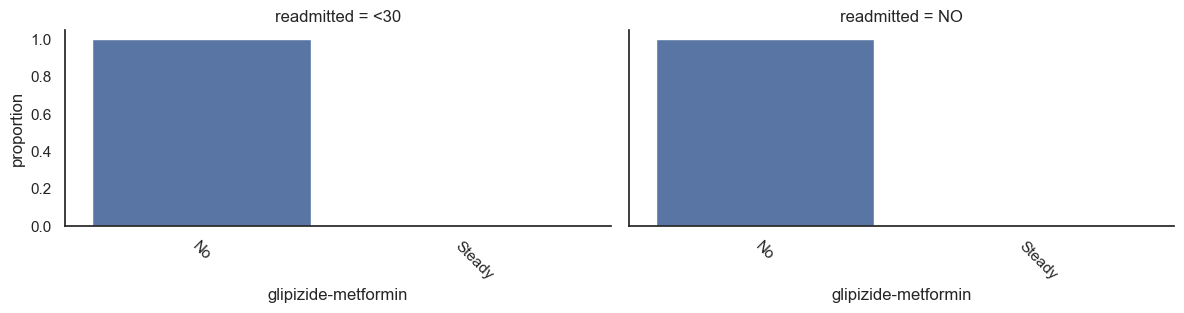

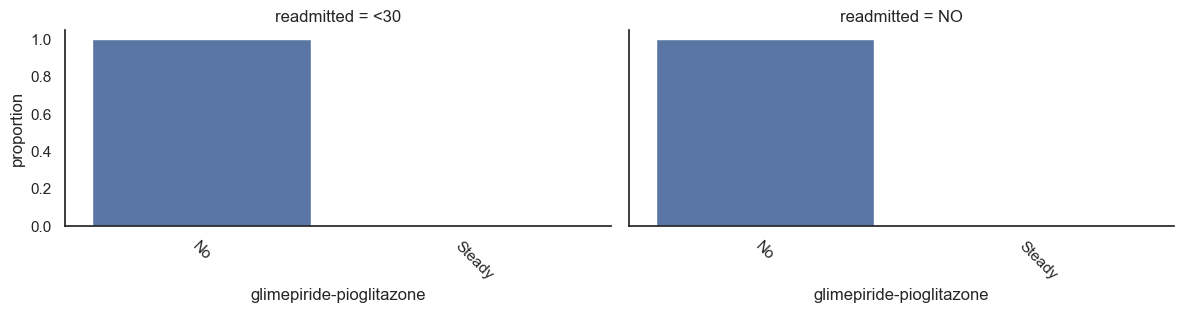

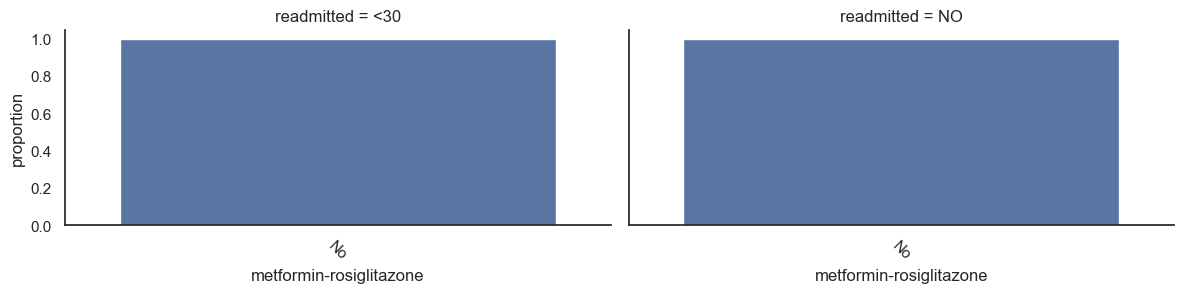

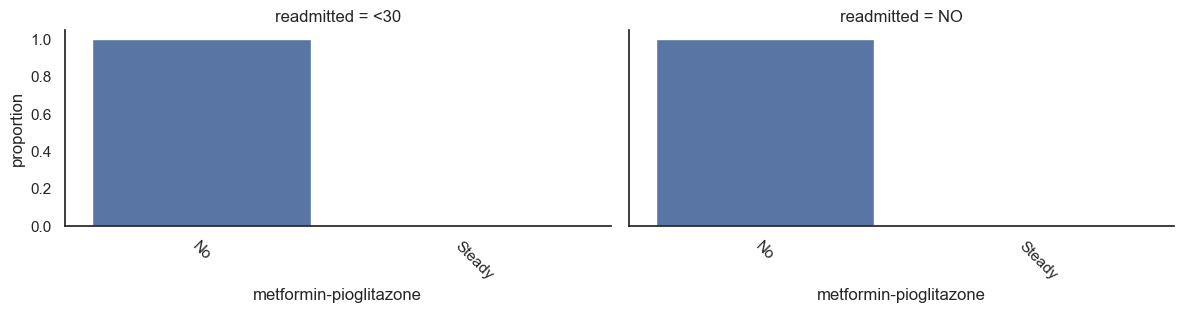

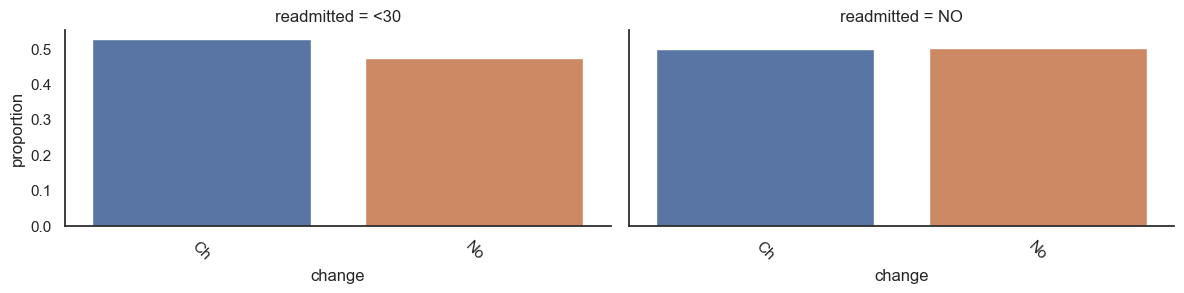

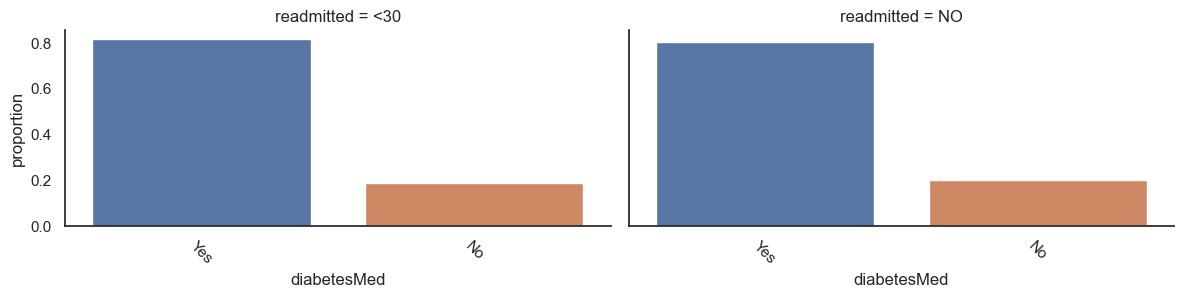

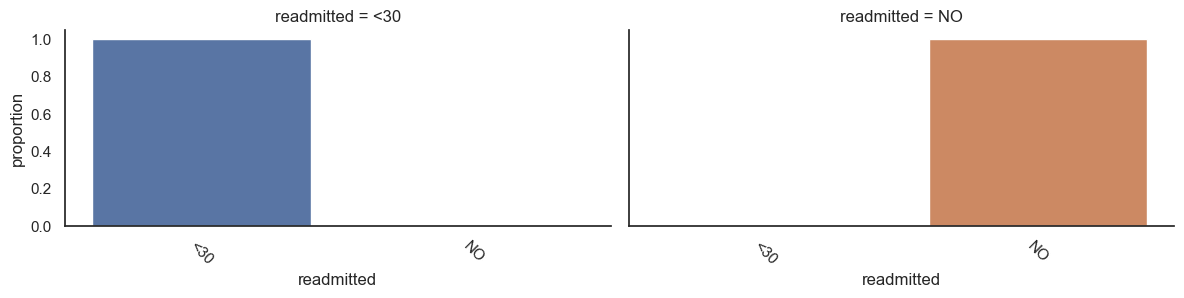

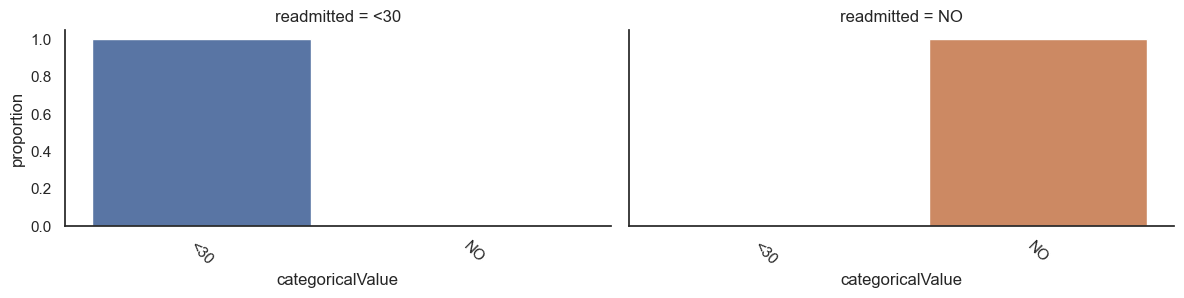

In [16]:
for col in nominal_features_subset.columns:
    df_grouped = pd.DataFrame(nominal_features_subset.groupby('readmitted')[col].value_counts(normalize=True))
    g = sns.catplot(x=col,y='proportion', hue=col,col='readmitted', data=df_grouped,kind='bar',orient='v',height = 3,aspect=2)
    for ax in g.axes.flat:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=-45)

A7: There are no marked proportion differences in the values of the features between patients that were readmitted or not.

EDA: Summary and conclusions:
    General:
        1. For computation reasons 'object' type features should be converted to 'categorical'.
        2. Features with > 40% missing values should be removed.
        3. The dtpye of some features (see above) is 'int64' and should be converted to 'categorical'.
        4. Some of the patients has multiple encounters. Since these samples are dependent, we will select only the first encounter per patient based on 'patient_nbr' which is a unique ID that was assigned once per patient.
    Categorical features:
        1. The features 'payer code','encounter_id, 'patient_nbr' are not important for the prediction, because these has nothing to do with the probability of readmission.
        2. The features 'admission_source_id','admission_type_id' and 'discharge_disposition_id' includes somewhat redundant values that should be further regrouped.
        3. It may be beneficial to further divide the diabetes diagnosis to controlled and uncontrolled diabetes.
        4. The values of Age should be regrouped based on the age definitions of ADA standards of care in diabetes.
        5. Some of the medications has one value for all encounters. These features can be removed.
    Numeric features:
        1. In case the model that will be used will rely on the assumption that the features are normally distributed, the features should be transformed.
        2. Some of the features includes mostly 1 value, therefore it may be beneficial to convert them to categorical e.g. with values of No / Yes. This will also solve the abnormal distribution issue.
